In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Modules import plot_ax_violins

In [2]:
def read_dataset(dataset):
    fname = 'References/%s-sequence.tsv' % dataset
    df = pd.read_csv(fname, sep='\t', header=0, index_col=[0,1])
    
    return df

def get_color():
    nums = [np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256)]
    vals = ['%02s' % hex(num)[2:].upper() for num in nums]
    color = '#' + ''.join(vals).replace(' ', '0')
    
    return color

def plot_violin(fig, top, df_stat, violin_args={}):
    
    df_cell = pd.DataFrame('', index=sorted(set(df_stat.index.get_level_values('CellType'))), columns=['Color'])
    for celltype in df_cell.index:
        df_cell.loc[celltype, 'Color'] = get_color()
    df_violin = df_stat.copy()
    df_violin.index = df_violin.index.get_level_values('CellType')
    
    args = (fig, top, df_violin, df_cell)
    plot_ax_violins.plot_dataframe(*args, **violin_args)
    
    return

def plot_dataset(df, top, fig):
    violin_args = {'left':.1,
                   'right':.9,
                   'row_count':5,
                   'rotation':90,
                   'ticklabels':False,
                   'limits':[(None,None),
                             (None,None),
                             (0,100),
                             (None,None),
                             (None,None)
                            ],
                   'show_violin':True,
                   'show_error':False,
                   'dh':.08
                  }

    plot_violin(fig, top, df, violin_args=violin_args)
    
    return

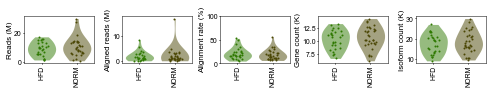

In [3]:
fig = plt.figure(figsize=(8.5,11))

dataset = 'Lab_Amanda'
df = read_dataset(dataset)
plot_dataset(df, 0.9, fig)
fig.savefig('Plots/Alignment_Stats_%s.pdf' % dataset)

plt.show()